In [3]:
import pandas as pd

In [4]:
data = pd.read_excel("product_return_analysis.xlsx")
print("Dataset loaded successfully")
print("First 5 rows:")
print(data.head())

Dataset loaded successfully
First 5 rows:
   OrderID  CustomerID ProductCategory ProductSubCategory  OrderValue  \
0        1        1102       Groceries             Fridge       16189   
1        2        1435       Furniture             Fridge        9490   
2        3        1860         Fashion             Mobile        5799   
3        4        1270       Furniture                 TV       14542   
4        5        1106         Fashion               Rice       14145   

   Quantity ReturnStatus   ReturnReason PaymentMethod  OrderDate DeliveryDate  \
0         4           No   Not Returned           COD 2023-01-01   2023-01-03   
1         1           No   Not Returned   Net Banking 2023-01-02   2023-01-04   
2         1           No   Not Returned           COD 2023-01-03   2023-01-05   
3         1           No   Not Returned   Credit Card 2023-01-04   2023-01-06   
4         2          Yes  Late Delivery           UPI 2023-01-05   2023-01-07   

   ShippingTime   Region  Custom

In [5]:
print("Dataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   OrderID             2000 non-null   int64         
 1   CustomerID          2000 non-null   int64         
 2   ProductCategory     2000 non-null   object        
 3   ProductSubCategory  2000 non-null   object        
 4   OrderValue          2000 non-null   int64         
 5   Quantity            2000 non-null   int64         
 6   ReturnStatus        2000 non-null   object        
 7   ReturnReason        2000 non-null   object        
 8   PaymentMethod       2000 non-null   object        
 9   OrderDate           2000 non-null   datetime64[ns]
 10  DeliveryDate        2000 non-null   datetime64[ns]
 11  ShippingTime        2000 non-null   int64         
 12  Region              2000 non-null   object        
 13  CustomerTenure      2000 non-null 

In [6]:
print("Missing Values in Each Column:")
print(data.isnull().sum())

Missing Values in Each Column:
OrderID               0
CustomerID            0
ProductCategory       0
ProductSubCategory    0
OrderValue            0
Quantity              0
ReturnStatus          0
ReturnReason          0
PaymentMethod         0
OrderDate             0
DeliveryDate          0
ShippingTime          0
Region                0
CustomerTenure        0
DiscountApplied       0
ReturnWindowDays      0
CustomerAgeGroup      0
Gender                0
dtype: int64


In [7]:
 # Return Count
print("Return Status Count:")
print(data['ReturnStatus'].value_counts())

print("\nReturn Status Percentage:")
print(data['ReturnStatus'].value_counts(normalize=True)*100)

Return Status Count:
ReturnStatus
No     1584
Yes     416
Name: count, dtype: int64

Return Status Percentage:
ReturnStatus
No     79.2
Yes    20.8
Name: proportion, dtype: float64


In [8]:
# Return Rate by Product Category
print("Return Rate by Product Category:")
print(data.groupby("ProductCategory")["ReturnStatus"].value_counts(normalize=True).unstack().fillna(0))

Return Rate by Product Category:
ReturnStatus           No       Yes
ProductCategory                    
Appliances       0.819277  0.180723
Electronics      0.768448  0.231552
Fashion          0.798450  0.201550
Furniture        0.800525  0.199475
Groceries        0.773585  0.226415


In [9]:
# Average Order Value for Returned vs Not Returned
print("Average Order Value for Returned vs Not Returned:")
print(data.groupby("ReturnStatus")["OrderValue"].mean())

Average Order Value for Returned vs Not Returned:
ReturnStatus
No      9823.668561
Yes    10473.454327
Name: OrderValue, dtype: float64


In [10]:
# Using if & loc – High Value Orders
data.loc[data["OrderValue"] > 10000, "HighValueFlag"] = "High Value"
data.loc[data["OrderValue"] <= 10000, "HighValueFlag"] = "Normal Value"

print("Example of High Value Orders Flag:")
print(data[["OrderValue", "HighValueFlag"]].head(10))

Example of High Value Orders Flag:
   OrderValue HighValueFlag
0       16189    High Value
1        9490  Normal Value
2        5799  Normal Value
3       14542    High Value
4       14145    High Value
5       10962    High Value
6       14512    High Value
7        7582  Normal Value
8        9182  Normal Value
9        7907  Normal Value


In [11]:
# Return Rate by Payment Method
print("Return Rate by Payment Method:")
print(data.groupby("PaymentMethod")["ReturnStatus"].value_counts(normalize=True).unstack().fillna(0))

Return Rate by Payment Method:
ReturnStatus         No       Yes
PaymentMethod                    
COD            0.801546  0.198454
Credit Card    0.815303  0.184697
Debit Card     0.800000  0.200000
Net Banking    0.790816  0.209184
UPI            0.755344  0.244656


In [12]:
# Using if & loc – Delivery Delays
data.loc[data["ShippingTime"] > 7, "DeliverySpeed"] = "Late Delivery"
data.loc[data["ShippingTime"] <= 7, "DeliverySpeed"] = "On Time"

print("Example of Delivery Speed Flag:")
print(data[["ShippingTime", "DeliverySpeed"]].head(10))

Example of Delivery Speed Flag:
   ShippingTime  DeliverySpeed
0            14  Late Delivery
1            13  Late Delivery
2            12  Late Delivery
3            10  Late Delivery
4             6        On Time
5             3        On Time
6             4        On Time
7             4        On Time
8             1        On Time
9             3        On Time


In [13]:
# Return Rate by Delivery Speed
print("Return Rate by Delivery Speed:")
print(data.groupby("DeliverySpeed")["ReturnStatus"].value_counts(normalize=True).unstack().fillna(0))

Return Rate by Delivery Speed:
ReturnStatus         No       Yes
DeliverySpeed                    
Late Delivery  0.803797  0.196203
On Time        0.781369  0.218631


In [14]:
# Regional Analysis of Returns
print("Return Rate by Region:")
print(data.groupby("Region")["ReturnStatus"].value_counts(normalize=True).unstack().fillna(0))


Return Rate by Region:
ReturnStatus        No       Yes
Region                          
Central       0.828877  0.171123
East          0.793103  0.206897
North         0.804455  0.195545
South         0.759174  0.240826
West          0.778947  0.221053


In [15]:
# Using if & loc – Discount Flag
data.loc[data["DiscountApplied"] > 0, "DiscountFlag"] = "Discounted"
data.loc[data["DiscountApplied"] == 0, "DiscountFlag"] = "No Discount"

print("Example of Discount Flag:")
print(data[["DiscountApplied", "DiscountFlag"]].head(10))


Example of Discount Flag:
   DiscountApplied DiscountFlag
0               31   Discounted
1               24   Discounted
2               40   Discounted
3               16   Discounted
4               13   Discounted
5               44   Discounted
6               12   Discounted
7               37   Discounted
8               38   Discounted
9                1   Discounted


In [16]:
# Return Rate by Discount Flag
print("Return Rate by Discount Flag:")
print(data.groupby("DiscountFlag")["ReturnStatus"].value_counts(normalize=True).unstack().fillna(0))


Return Rate by Discount Flag:
ReturnStatus        No       Yes
DiscountFlag                    
Discounted    0.790249  0.209751
No Discount   0.903226  0.096774


In [18]:
# User Input Section
# (a) Check if a given Order is High Value or Normal
user_value = int(input("Enter Order Value (₹): "))

if user_value > 10000:
    print("This is a HIGH VALUE Order.")
else:
    print("This is a NORMAL VALUE Order.")


Enter Order Value (₹):  34


This is a NORMAL VALUE Order.


In [19]:
# (b) Predict Delivery Speed
user_days = int(input("Enter Shipping Time in Days: "))

if user_days > 7:
    print("Delivery Status: Late Delivery ")
else:
    print("Delivery Status: On Time ")


Enter Shipping Time in Days:  45


Delivery Status: Late Delivery 


In [20]:
# (c) Discount Check
user_discount = int(input("Enter Discount Percentage: "))

if user_discount > 0:
    print("This product was purchased on DISCOUNT ")
else:
    print("This product was purchased at FULL PRICE ")


Enter Discount Percentage:  34


This product was purchased on DISCOUNT 


In [ ]:
# cia 3 user interface 


In [ ]:
# Step 1: Import necessary libraries
import tkinter as tk
from tkinter import messagebox

In [ ]:
# Step 2: Define function to classify order and delivery details
def classify_order():
    try:
        order_value = int(entry_order_value.get())
        shipping_time = int(entry_shipping_time.get())
        discount = int(entry_discount.get())
    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid integers in all fields.")
        return

    # Classify order value
    if order_value >= 10000:
        order_class = "HIGH VALUE ORDER"
    else:
        order_class = "NORMAL VALUE ORDER"

    # Classify shipping time
    if shipping_time > 7:
        delivery_class = "LATE DELIVERY"
    else:
        delivery_class = "ON TIME DELIVERY"

    # Classify discount status
    if discount > 0:
        discount_class = "DISCOUNT APPLIED"
    else:
        discount_class = "NO DISCOUNT"

    # Prepare final message
    result = (f"Order Classification: {order_class}\n"
              f"Delivery Status: {delivery_class}\n"
              f"Discount Status: {discount_class}")

    # Show result in popup
    messagebox.showinfo("Classification Result", result)

In [ ]:
# Step 3: Create main window
root = tk.Tk()
root.title("Product Return Analysis Interactive Tool")


In [ ]:
# Step 5: Add classify button
btn_classify = tk.Button(root, text="Classify Order", command=classify_order)
btn_classify.grid(row=3, column=0, columnspan=2, pady=10)


In [ ]:
# Step 6: Start the application
root.mainloop()

In [ ]:
# cia - 4 visulaization

In [10]:
import tkinter as tk
from tkinter import messagebox
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np

# MODULE 1: RETURN CLASSIFICATION LOGIC

def classify_product_return(order_value, shipping_time, discount):
    """
    Classify returns based on input values.
    Returns classification results as dictionary.
    """
    classification = {}

    classification['Order Value Class'] = 'HIGH VALUE ORDER' if order_value >= 10000 else 'NORMAL VALUE ORDER'
    classification['Delivery Status'] = 'LATE DELIVERY' if shipping_time >= 7 else 'ON TIME DELIVERY'
    classification['Discount Status'] = 'DISCOUNT APPLIED' if discount > 0 else 'NO DISCOUNT'

    return classification

In [11]:
# MODULE 2: VISUALIZATION COMPONENTS

def show_product_return_visualizations():
    """
    Display charts related to return order data classification.
    Uses pastel coloring.
    """
    categories = ['High Value Order', 'Normal Order', 'Late Delivery', 'On-Time Delivery', 'Discount Applied', 'No Discount']
    values = [120, 200, 50, 270, 80, 240]  # Example counts or metrics

    # Bar Chart
    plt.figure(figsize=(8,5))
    bars = plt.bar(categories, values, color=['#ADD8E6','#FFB6C1','#ADD8E6','#FFB6C1','#ADD8E6','#FFB6C1'])
    plt.title('Product Return Classifications')
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

    # Pie Chart
    plt.figure(figsize=(6,6))
    plt.pie(values, labels=categories, autopct='%1.1f%%',
            startangle=140, colors=['#FFB6C1','#ADD8E6','#FFB6C1','#ADD8E6','#FFB6C1','#ADD8E6'])
    plt.title('Product Return Distribution')
    plt.tight_layout()
    plt.show()



In [12]:
# MODULE 3: USER INTERFACE (Tkinter)

import tkinter as tk
from tkinter import messagebox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt

def get_return_bar_fig(categories, values):
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.bar(categories, values, color=['#ADD8E6','#FFB6C1','#ADD8E6','#FFB6C1','#ADD8E6','#FFB6C1'])
    ax.set_title('Product Return Classifications')
    ax.set_ylabel('Count')
    ax.set_xticklabels(categories, rotation=30, ha='right')
    plt.tight_layout()
    return fig

def get_return_pie_fig(categories, values):
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.pie(values, labels=categories, autopct='%1.1f%%', startangle=140,
           colors=['#ADD8E6','#FFB6C1','#ADD8E6','#FFB6C1','#ADD8E6','#FFB6C1'])
    ax.set_title('Product Return Distribution')
    plt.tight_layout()
    return fig

def get_return_line_fig():
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
    return_rate = [20, 40, 60, 45, 35, 50]  # Example trend
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.plot(months, return_rate, marker='o', linestyle='-', color='#FFB6C1')
    ax.set_title('Monthly Return Rate Trend')
    ax.set_xlabel('Month')
    ax.set_ylabel('Return Rate (%)')
    ax.grid(True)
    plt.tight_layout()
    return fig

def open_ui():
    root = tk.Tk()
    root.title("Product Return Analysis")
    root.geometry("680x820")
    root.config(bg="#f0f8ff")

    tk.Label(root, text="Product Return Analysis", font=("Arial", 21, "bold"), bg="#f0f8ff").pack(pady=15)

    frame = tk.Frame(root, bg="#f0f8ff")
    frame.pack(pady=5)

    labels = ["Order Value:", "Shipping Time (days):", "Discount Percentage:"]
    entries = {}
    for i, label in enumerate(labels):
        tk.Label(frame, text=label, bg="#f0f8ff").grid(row=i, column=0, sticky="e", pady=6, padx=5)
        entry = tk.Entry(frame)
        entry.grid(row=i, column=1, pady=6, padx=5)
        entries[label] = entry

    plot_frames = []
    for _ in range(3):
        pf = tk.Frame(root, bg="#f0f8ff")
        pf.pack(pady=7, fill=tk.BOTH, expand=False)
        plot_frames.append(pf)

    def classify_product_return(order_value, shipping_time, discount):
        classification = {}
        classification['Order Value Class'] = 'HIGH VALUE ORDER' if order_value >= 10000 else 'NORMAL VALUE ORDER'
        classification['Delivery Status'] = 'LATE DELIVERY' if shipping_time >= 7 else 'ON TIME DELIVERY'
        classification['Discount Status'] = 'DISCOUNT APPLIED' if discount > 0 else 'NO DISCOUNT'
        return classification

    def on_classify():
        try:
            order_value = int(entries["Order Value:"].get())
            shipping_time = int(entries["Shipping Time (days):"].get())
            discount = int(entries["Discount Percentage:"].get())
        except ValueError:
            messagebox.showerror("Input Error", "Please enter valid integers in all fields.")
            return

        result = classify_product_return(order_value, shipping_time, discount)
        result_str = "\n".join([f"{k}: {v}" for k, v in result.items()])
        messagebox.showinfo("Classification Results", result_str)

    def show_return_visualizations():
        for pf in plot_frames:
            for widget in pf.winfo_children():
                widget.destroy()

        categories = ['High Value Order', 'Normal Order', 'Late Delivery', 'On-Time Delivery', 'Discount Applied', 'No Discount']
        values = [120, 200, 50, 270, 80, 240]  # Sample data

        # Bar chart
        bar_fig = get_return_bar_fig(categories, values)
        bar_canvas = FigureCanvasTkAgg(bar_fig, master=plot_frames[0])
        bar_canvas.draw()
        bar_canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

        # Pie chart
        pie_fig = get_return_pie_fig(categories, values)
        pie_canvas = FigureCanvasTkAgg(pie_fig, master=plot_frames[1])
        pie_canvas.draw()
        pie_canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

        # Line chart
        line_fig = get_return_line_fig()
        line_canvas = FigureCanvasTkAgg(line_fig, master=plot_frames[2])
        line_canvas.draw()
        line_canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

    btn_classify = tk.Button(root, text="Classify Return", command=on_classify, bg="#ADD8E6", fg="black", padx=12, pady=8)
    btn_classify.pack(pady=10)

    btn_charts = tk.Button(root, text="Show Charts", command=show_return_visualizations, bg="#FFB6C1", fg="black", padx=12, pady=8)
    btn_charts.pack(pady=6)

    btn_exit = tk.Button(root, text="Exit", command=root.destroy, bg="#FFFFFF", fg="#333333", padx=12, pady=8)
    btn_exit.pack(pady=10)

    root.mainloop()


   

C:\Users\dell\AppData\Local\Temp\ipykernel_4792\1440567465.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categories, rotation=30, ha='right')


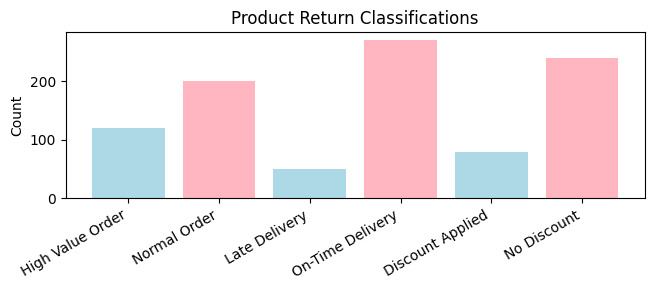

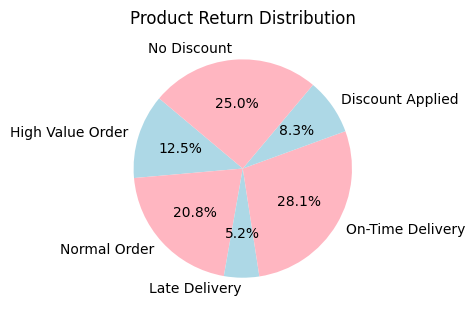

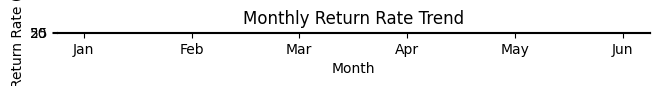

In [13]:
# MODULE 4: MAIN EXECUTION

if __name__ == "__main__":
    open_ui()